In [1]:
# Importing package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
col = ['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved']
crx_data = pd.read_csv('crx.data', names=col)

In [3]:
# Printing data info and sample
print(crx_data.describe(), "\n\n")
print(crx_data.info())
crx_data.sample(5)

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
384,b,22.08,11.460,u,g,k,v,1.585,f,f,0,t,g,00100,1212,-
43,b,39.58,13.915,u,g,w,v,8.625,t,t,6,t,g,00070,0,+
372,a,45.00,4.585,u,g,k,h,1.000,f,f,0,t,s,00240,0,-
89,a,49.00,1.500,u,g,j,j,0.000,t,f,0,t,g,00100,27,-
152,b,37.33,6.500,u,g,m,h,4.250,t,t,12,t,g,00093,0,+


In [4]:
cols = ['Male', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen']
for col in cols:
    print('Unique values in {}: {}'.format(col, crx_data[col].unique()))

Unique values in Male: ['b' 'a' '?']
Unique values in Married: ['u' 'y' '?' 'l']
Unique values in BankCustomer: ['g' 'p' '?' 'gg']
Unique values in EducationLevel: ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
Unique values in Ethnicity: ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
Unique values in PriorDefault: ['t' 'f']
Unique values in Employed: ['t' 'f']
Unique values in DriversLicense: ['f' 't']
Unique values in Citizen: ['g' 's' 'p']


In [5]:
# Replacing missing values imputed as '?' to Nan and...
# ..changing age and zipcode feature data type to float and int respectively
crx_data = crx_data.replace(['?'], np.nan)
crx_data.Age = crx_data.Age.astype('float')

In [6]:
# Checking for missing values
crx_data.isnull().sum().sort_values(ascending=False)

ZipCode           13
Age               12
Male              12
Ethnicity          9
EducationLevel     9
BankCustomer       6
Married            6
Approved           0
Income             0
Citizen            0
DriversLicense     0
CreditScore        0
Employed           0
PriorDefault       0
YearsEmployed      0
Debt               0
dtype: int64

In [7]:
crx_data.fillna(crx_data.mean(), inplace=True)  # Imputing missng values of numeric features with mean values
crx_data.fillna('ffil', inplace=True)  # Imputing missing values of categorical feature
crx_data.isnull().sum() # Checking null value(s)

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

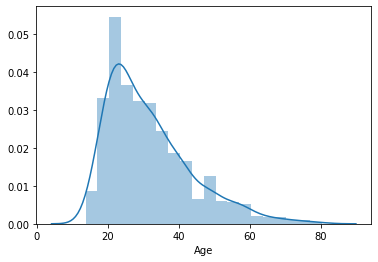

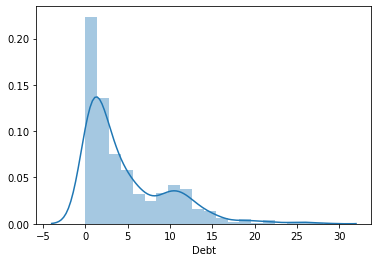

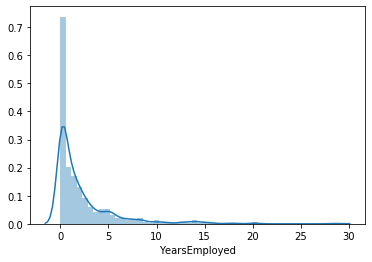

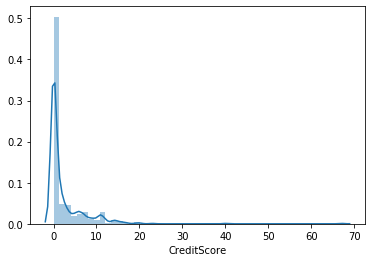

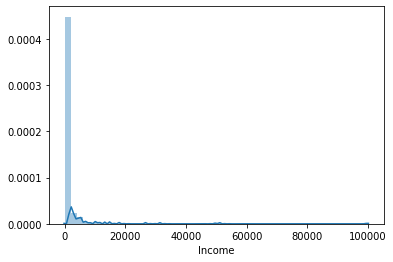

In [8]:
# Visualising data distribution
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(crx_data['Age'])
plotDistPlot(crx_data['Debt'])
plotDistPlot(crx_data['YearsEmployed'])
plotDistPlot(crx_data['CreditScore'])
plotDistPlot(crx_data['Income'])

In [9]:
# Applying logarithmic scale to correct skewness
num_cols = list(crx_data.select_dtypes(exclude='object'))
crx_data[num_cols] = crx_data[num_cols].apply(lambda x: np.log(x + 1))

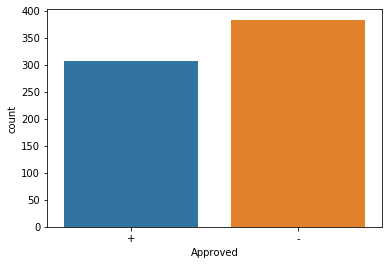

In [10]:
# check for approved
sns.countplot(data = crx_data, x = 'Approved')
plt.show()

In [11]:
#converting non-numeric to numeric values
le = LabelEncoder()
for col in crx_data:
    if crx_data[col].dtypes=='object':
        crx_data[col]=le.fit_transform(crx_data[col])

In [12]:
# Removing the feature which are not important and converting to NumPy array
crx_data = crx_data.drop(['DriversLicense', 'ZipCode'], axis=1)
crx_data = crx_data.values

In [13]:
# Creating new variable to input features and labels
X,y = crx_data[:,0:13] , crx_data[:,13]

# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

In [14]:
# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [15]:
# Fitting logistic regression with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Using the trained model to predict instances from the test set
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg.score(rescaledX_test, Y_test))

# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Logistic regression classifier has accuracy of:  0.8913043478260869


array([[60,  3],
       [12, 63]], dtype=int64)

In [17]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary
param_grid = dict(tol=tol, max_iter=max_iter)

# Initializing GridSearchCV
grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Calculating and summarizing the final results
grid_model_result = grid_model.fit(rescaledX_train, y_train)
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_ 
print("Best: %f using %s" %  (best_score, best_params))

Best: 0.855072 using {'max_iter': 100, 'tol': 0.001}


In [18]:
# Fitting logistic regression with best parameter values from gridsearch
logreg2 = LogisticRegression(max_iter=100, tol=0.001)
logreg2.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.001, verbose=0,
                   warm_start=False)

In [19]:
# Using the trained model to predict instances from the test set
y_pred2 = logreg2.predict(rescaledX_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg2.score(rescaledX_test, Y_test))

# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred2)

Logistic regression classifier has accuracy of:  0.8913043478260869


array([[60,  3],
       [12, 63]], dtype=int64)